### imports

In [103]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

#an attempt to translate our firt table
import googletrans
from googletrans import Translator


### scraping a table from wikipedia with the help of the command 'read_html'

In [104]:
url = "https://he.wikipedia.org/wiki/%D7%AA%D7%91%D7%A0%D7%99%D7%AA:%D7%A8%D7%99%D7%9B%D7%95%D7%96_%D7%98%D7%91%D7%9C%D7%90%D7%95%D7%AA_%D7%9E%D7%92%D7%A4%D7%AA_%D7%94%D7%A7%D7%95%D7%A8%D7%95%D7%A0%D7%94"
df=pd.read_html(url, skiprows=3)
df = df[0]
df.head(10)

,0,1,2,3,4,5,6,7,8
0,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3],NaN
1,231 מדינות/טריטוריות + 2 ספינות,424441573,53538,81977,5903707,745,59.73%,52.78%,NaN
2,ארצות הברית[4] / [ערך],80072561,239614,12060,959130,2870,79.62%,66.33%,NaN
3,הודו / [ערך],42822473,30540,8944,511935,365,68.63%,55.01%,NaN
4,ברזיל / [ערך],28167587,130995,8318,643938,2995,81.92%,71.36%,NaN
5,צרפת / [ערך],22227826,339307,3055,136594,2085,82.31%,79.56%,NaN
6,הממלכה המאוחדת / [ערך],18605752,271742,331,160581,2345,NaN,NaN,NaN
7,רוסיה / [ערך],15370419,105250,2300,345500,2366,NaN,NaN,NaN
8,גרמניה / [ערך],13523782,160574,2494,121846,1447,75.24%,74.16%,NaN
9,טורקיה / [ערך],13434130,156536,1128,92188,1074,NaN,NaN,NaN


### checking for null valuse

In [105]:
df.isnull().sum()


0      2
1      6
2     15
3      6
4    158
5    310
6    402
7    463
8    661
dtype: int64

### droping the 8th colomn 

In [106]:
del df[8]
df.head()

,0,1,2,3,4,5,6,7
0,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
1,231 מדינות/טריטוריות + 2 ספינות,424441573,53538,81977,5903707,745,59.73%,52.78%
2,ארצות הברית[4] / [ערך],80072561,239614,12060,959130,2870,79.62%,66.33%
3,הודו / [ערך],42822473,30540,8944,511935,365,68.63%,55.01%
4,ברזיל / [ערך],28167587,130995,8318,643938,2995,81.92%,71.36%


### changing the first row to be the title 

In [107]:
df.columns = df. iloc[0]
df = df. drop(0)
df = df. reset_index(drop=True)
df.head()

,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
0,231 מדינות/טריטוריות + 2 ספינות,424441573,53538,81977,5903707,745,59.73%,52.78%
1,ארצות הברית[4] / [ערך],80072561,239614,12060,959130,2870,79.62%,66.33%
2,הודו / [ערך],42822473,30540,8944,511935,365,68.63%,55.01%
3,ברזיל / [ערך],28167587,130995,8318,643938,2995,81.92%,71.36%
4,צרפת / [ערך],22227826,339307,3055,136594,2085,82.31%,79.56%


### droping the first row that is Irrelevant

In [108]:
df = df. drop(0)
df.head()

,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
1,ארצות הברית[4] / [ערך],80072561,239614,12060,959130,2870,79.62%,66.33%
2,הודו / [ערך],42822473,30540,8944,511935,365,68.63%,55.01%
3,ברזיל / [ערך],28167587,130995,8318,643938,2995,81.92%,71.36%
4,צרפת / [ערך],22227826,339307,3055,136594,2085,82.31%,79.56%
5,הממלכה המאוחדת / [ערך],18605752,271742,331,160581,2345,NaN,NaN


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   מדינה / טריטוריה  658 non-null    object
 1   מקרי הדבקה        654 non-null    object
 2   למליון            645 non-null    object
 3   במצב קשה          654 non-null    object
 4   מקרי מוות         502 non-null    object
 5   למליון            350 non-null    object
 6   חוסנו[3]          258 non-null    object
 7   מלא[3]            197 non-null    object
dtypes: object(8)
memory usage: 46.4+ KB


#### in our original table there are 226 countries

In [110]:
for i in range (227,661):
    df = df.drop(i)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 1 to 226
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   מדינה / טריטוריה  226 non-null    object
 1   מקרי הדבקה        226 non-null    object
 2   למליון            224 non-null    object
 3   במצב קשה          226 non-null    object
 4   מקרי מוות         226 non-null    object
 5   למליון            215 non-null    object
 6   חוסנו[3]          133 non-null    object
 7   מלא[3]            133 non-null    object
dtypes: object(8)
memory usage: 15.9+ KB


In [111]:
df.tail()

,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
222,MS Zaandam‏ (אנ') אוניית תענוגות,9,NaN,0,2,NaN,NaN,NaN
223,איי מרשל,7,117,0,0,NaN,NaN,NaN
224,איי קוק,4,227,?,0,NaN,NaN,NaN
225,סנט הלנה,2,327,0,0,NaN,NaN,NaN
226,מיקרונזיה,1,9,0,0,NaN,NaN,NaN


In [112]:

import googletrans
from googletrans import Translator




### we have lots of null valuse so we searched for more data.

### we found a table with all the countries and the presentage of vaccenated.

In [113]:
url = "https://en.wikipedia.org/wiki/COVID-19_vaccine"
df2 =pd.read_html(url, skiprows=1)
df2 = df2[1]
df2.head(10)

,Unnamed: 0,World[d],"4,898,997,900",62.2%
0,NaN,China,1266426000,87.7%
1,NaN,India,962283459,69.1%
2,NaN,European Union,334961077,74.9%
3,NaN,United States[e],252791817,76.1%
4,NaN,Indonesia,189533698,68.6%
5,NaN,Brazil,176141497,82.3%
6,NaN,Pakistan,122046024,54.2%
7,NaN,Bangladesh,102503628,61.6%
8,NaN,Japan,101571281,80.6%
9,NaN,Mexico,84958858,65.2%


In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     0 non-null      float64
 1   World[d]       221 non-null    object 
 2   4,898,997,900  221 non-null    int64  
 3   62.2%          221 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.0+ KB


In [115]:
del df2['Unnamed: 0']
del df2['4,898,997,900']
df2.head()

,World[d],62.2%
0,China,87.7%
1,India,69.1%
2,European Union,74.9%
3,United States[e],76.1%
4,Indonesia,68.6%


In [116]:
df2.rename({'World[d]': 'Country','62.2%':'vaccenated'}, axis=1, inplace=True)
df2.head()

,Country,vaccenated
0,China,87.7%
1,India,69.1%
2,European Union,74.9%
3,United States[e],76.1%
4,Indonesia,68.6%


In [117]:
#df['Country'].rename({0: 'Country', 1: 'unfaction'}, axis=1, inplace=True)
df2 = df2.replace(regex=[' '], value='')
df2.head()

,Country,vaccenated
0,China,87.7%
1,India,69.1%
2,EuropeanUnion,74.9%
3,UnitedStates[e],76.1%
4,Indonesia,68.6%


In [118]:

df2['Country'] = df2['Country'].replace(['UnitedStates[e]'],'USA')
df2['Country'] = df2['Country'].replace(['UnitedKingdom'],'UK')
df2['Country'] = df2['Country'].replace(['Italy[f]'],'Italy')
df2['Country'] = df2['Country'].replace(['SouthKorea'],'S.Korea')
df2.head(20)

,Country,vaccenated
0,China,87.7%
1,India,69.1%
2,EuropeanUnion,74.9%
3,USA,76.1%
4,Indonesia,68.6%
5,Brazil,82.3%
6,Pakistan,54.2%
7,Bangladesh,61.6%
8,Japan,80.6%
9,Mexico,65.2%


### we still have a lack of data so we kept on searching for more data.

In [119]:

url = "https://www.worldometers.info/coronavirus/?utm_campaign=homeAdvegas1?/embed/fd0k_hbXWcQ"

res = requests.get(url)
soup = bs(res.content, 'html.parser')

table_data = soup.select_one('#main_table_countries_today')


In [120]:
headers = []
for i in table_data.find_all('th'):
    title = i.text
    headers.append(title)

In [121]:

df3 = pd.DataFrame(columns = headers)

for j in table_data.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [tr.text for tr in row_data]
        length = len(df3)
        
        df3.loc[length] = row
df3.head() 

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,\nNorth America\n,"94,100,362","+20,485","1,383,431",+471,"63,720,311","+21,071","28,996,620","18,515",...,,,,North America,\n,,,,,
1,,\nAsia\n,"111,918,121","+359,047","1,332,687","+1,077","103,875,387","+297,006","6,710,047","30,553",...,,,,Asia,\n,,,,,
2,,\nSouth America\n,"53,250,208","+29,983","1,247,800",+146,"46,172,330","+15,947","5,830,078","14,008",...,,,,South America,\n,,,,,
3,,\nEurope\n,"150,452,585","+438,183","1,684,895","+1,484","122,569,403","+869,575","26,198,287","16,632",...,,,,Europe,\n,,,,,
4,,\nAfrica\n,"11,430,369","+2,858","247,449",+27,"10,438,114","+4,663","744,806","1,996",...,,,,Africa,\n,,,,,


In [122]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    242 non-null    object
 1   Country,Other        242 non-null    object
 2   TotalCases           242 non-null    object
 3   NewCases             242 non-null    object
 4   TotalDeaths          242 non-null    object
 5   NewDeaths            242 non-null    object
 6   TotalRecovered       242 non-null    object
 7   NewRecovered         242 non-null    object
 8   ActiveCases          242 non-null    object
 9   Serious,Critical     242 non-null    object
 10  Tot Cases/1M pop     242 non-null    object
 11  Deaths/1M pop        242 non-null    object
 12  TotalTests           242 non-null    object
 13  Tests/
1M pop
       242 non-null    object
 14  Population           242 non-null    object
 15  Continent            242 non-null    object
 16  1 Caseev

In [123]:
df3 = df3.replace(regex=['\n'], value='')
df3 = df3.replace(regex=[' '], value='')
df3 = df3.replace(regex=[','], value='')

#df3 = df3.replace(regex=["+"], value='')
df3.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,NorthAmerica,94100362,+20485,1383431,+471,63720311,+21071,28996620,18515,...,,,,NorthAmerica,,,,,,
1,,Asia,111918121,+359047,1332687,+1077,103875387,+297006,6710047,30553,...,,,,Asia,,,,,,
2,,SouthAmerica,53250208,+29983,1247800,+146,46172330,+15947,5830078,14008,...,,,,SouthAmerica,,,,,,
3,,Europe,150452585,+438183,1684895,+1484,122569403,+869575,26198287,16632,...,,,,Europe,,,,,,
4,,Africa,11430369,+2858,247449,+27,10438114,+4663,744806,1996,...,,,,Africa,,,,,,


### we didnt fined a way to deleat the char '+', and we dont think that there is a strong co variance between the colomns with the new cases, therefore we will drop those colomns

In [124]:
del df3['NewCases'] # +
del df3['NewDeaths'] # +
del df3['NewRecovered'] # +
del df3['Continent'] # irrelevent
del df3['New Deaths/1M pop'] # empty
del df3['New Cases/1M pop'] # empty
#del df3['TotalCases']
#del df3['TotalDeaths']
#del df3['TotalTests']
df3.head()

,#,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
0,,NorthAmerica,94100362,1383431,63720311,28996620,18515,,,,,,,,,
1,,Asia,111918121,1332687,103875387,6710047,30553,,,,,,,,,
2,,SouthAmerica,53250208,1247800,46172330,5830078,14008,,,,,,,,,
3,,Europe,150452585,1684895,122569403,26198287,16632,,,,,,,,,
4,,Africa,11430369,247449,10438114,744806,1996,,,,,,,,,


### droping the 7 first rows which are irrelevent (Continents and the whole world)

In [125]:
for i in range (0,8):
    df3 = df3.drop(i)
df3.head()

,#,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
8,1,USA,80072561,959130,51544851,27568580,12060,239614,2870,938400179,2808127,334172983,4,348,0,82498
9,2,India,42822473,511935,42086383,224155,8944,30540,365,759315246,541532,1402161648,33,2739,2,160
10,3,Brazil,28167587,643938,24949782,2573867,8318,130995,2995,63776166,296596,215027255,8,334,3,11970
11,4,France,22227826,136594,18921479,3169753,3055,339307,2085,243529298,3717468,65509449,3,480,0,48386
12,5,UK,18605752,160581,16710324,1734847,331,271742,2345,474976532,6937155,68468489,4,426,0,25338


In [126]:
df3.rename({'Country,Other': 'Country'}, axis=1, inplace=True)
df3.head()

,#,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
8,1,USA,80072561,959130,51544851,27568580,12060,239614,2870,938400179,2808127,334172983,4,348,0,82498
9,2,India,42822473,511935,42086383,224155,8944,30540,365,759315246,541532,1402161648,33,2739,2,160
10,3,Brazil,28167587,643938,24949782,2573867,8318,130995,2995,63776166,296596,215027255,8,334,3,11970
11,4,France,22227826,136594,18921479,3169753,3055,339307,2085,243529298,3717468,65509449,3,480,0,48386
12,5,UK,18605752,160581,16710324,1734847,331,271742,2345,474976532,6937155,68468489,4,426,0,25338


In [127]:
del df3['#']

In [128]:
final_df = pd.merge( df2, df3, how="left", on=["Country", "Country"])
final_df.head()

,Country,vaccenated,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
0,China,87.7%,107707,4636,101449,1622,7,75,3,160000000,111163,1439323776,13363,310467,9,1
1,India,69.1%,42822473,511935,42086383,224155,8944,30540,365,759315246,541532,1402161648,33,2739,2,160
2,EuropeanUnion,74.9%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,76.1%,80072561,959130,51544851,27568580,12060,239614,2870,938400179,2808127,334172983,4,348,0,82498
4,Indonesia,68.6%,5197505,146365,4514782,536358,2536,18679,526,81003675,291122,278246905,54,1901,3,1928


In [129]:
final_df.isnull().sum()

Country                 0
vaccenated              0
TotalCases             23
TotalDeaths            23
TotalRecovered         23
ActiveCases            23
Serious,Critical       23
Tot Cases/1M pop       23
Deaths/1M pop          23
TotalTests             23
Tests/\n1M pop\n       23
Population             23
1 Caseevery X ppl      23
1 Deathevery X ppl     23
1 Testevery X ppl      23
Active Cases/1M pop    23
dtype: int64

### we have 23 Countries that didenf fined a mach, we decided to drop them because the colomn of the presentege of vaccenation is more important.

In [130]:
final_df.tail()

,Country,vaccenated,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
216,Montserrat,37.0%,163,2,161,0,,32620,400,7796,1560136,4997,31,2499,1,
217,Niue,73.2%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,Tokelau,70.8%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,PitcairnIslands,100.0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,NorthKorea,0.0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
final_df = final_df.dropna()
final_df.isnull().sum()

Country                0
vaccenated             0
TotalCases             0
TotalDeaths            0
TotalRecovered         0
ActiveCases            0
Serious,Critical       0
Tot Cases/1M pop       0
Deaths/1M pop          0
TotalTests             0
Tests/\n1M pop\n       0
Population             0
1 Caseevery X ppl      0
1 Deathevery X ppl     0
1 Testevery X ppl      0
Active Cases/1M pop    0
dtype: int64

In [132]:
final_df = final_df.set_index('Country')
final_df.head()

,vaccenated,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
Country,,,,,,,,,,,,,,,
China,87.7%,107707,4636,101449,1622,7,75,3,160000000,111163,1439323776,13363,310467,9,1
India,69.1%,42822473,511935,42086383,224155,8944,30540,365,759315246,541532,1402161648,33,2739,2,160
USA,76.1%,80072561,959130,51544851,27568580,12060,239614,2870,938400179,2808127,334172983,4,348,0,82498
Indonesia,68.6%,5197505,146365,4514782,536358,2536,18679,526,81003675,291122,278246905,54,1901,3,1928
Brazil,82.3%,28167587,643938,24949782,2573867,8318,130995,2995,63776166,296596,215027255,8,334,3,11970


In [133]:

final_df = final_df.replace(regex=['%'], value='')
final_df.head()

,vaccenated,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
Country,,,,,,,,,,,,,,,
China,87.7,107707,4636,101449,1622,7,75,3,160000000,111163,1439323776,13363,310467,9,1
India,69.1,42822473,511935,42086383,224155,8944,30540,365,759315246,541532,1402161648,33,2739,2,160
USA,76.1,80072561,959130,51544851,27568580,12060,239614,2870,938400179,2808127,334172983,4,348,0,82498
Indonesia,68.6,5197505,146365,4514782,536358,2536,18679,526,81003675,291122,278246905,54,1901,3,1928
Brazil,82.3,28167587,643938,24949782,2573867,8318,130995,2995,63776166,296596,215027255,8,334,3,11970


In [134]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, China to Montserrat
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   vaccenated           198 non-null    object
 1   TotalCases           198 non-null    object
 2   TotalDeaths          198 non-null    object
 3   TotalRecovered       198 non-null    object
 4   ActiveCases          198 non-null    object
 5   Serious,Critical     198 non-null    object
 6   Tot Cases/1M pop     198 non-null    object
 7   Deaths/1M pop        198 non-null    object
 8   TotalTests           198 non-null    object
 9   Tests/
1M pop
       198 non-null    object
 10  Population           198 non-null    object
 11  1 Caseevery X ppl    198 non-null    object
 12  1 Deathevery X ppl   198 non-null    object
 13  1 Testevery X ppl    198 non-null    object
 14  Active Cases/1M pop  198 non-null    object
dtypes: object(15)
memory usage: 24.8+ KB


In [142]:
final_df = final_df.replace(regex=[''], value=-1)
final_df = final_df.replace(regex=['N/A'], value=-1)


In [143]:
#a = final_df.loc[final_df['Country']=='FrenchPolynesia']


In [144]:
for column in final_df:
    final_df[column] = final_df[column].astype(float, errors = 'raise')
#final_df['vaccenated'] = final_df['vaccenated'].astype(float, errors = 'raise')
#final_df['TotalCases'] = final_df['TotalCases'].astype(float, errors = 'raise')
#final_df['vaccenated'] = final_df['vaccenated'].astype(float, errors = 'raise')
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, China to Montserrat
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vaccenated           198 non-null    float64
 1   TotalCases           198 non-null    float64
 2   TotalDeaths          198 non-null    float64
 3   TotalRecovered       198 non-null    float64
 4   ActiveCases          198 non-null    float64
 5   Serious,Critical     198 non-null    float64
 6   Tot Cases/1M pop     198 non-null    float64
 7   Deaths/1M pop        198 non-null    float64
 8   TotalTests           198 non-null    float64
 9   Tests/
1M pop
       198 non-null    float64
 10  Population           198 non-null    float64
 11  1 Caseevery X ppl    198 non-null    float64
 12  1 Deathevery X ppl   198 non-null    float64
 13  1 Testevery X ppl    198 non-null    float64
 14  Active Cases/1M pop  198 non-null    float64
dtypes: float64(15)
memory usage: 24.8+

In [152]:
final_df[final_df[-1]].count()


KeyError: -1

In [ ]:
final_df.isnull().sum()

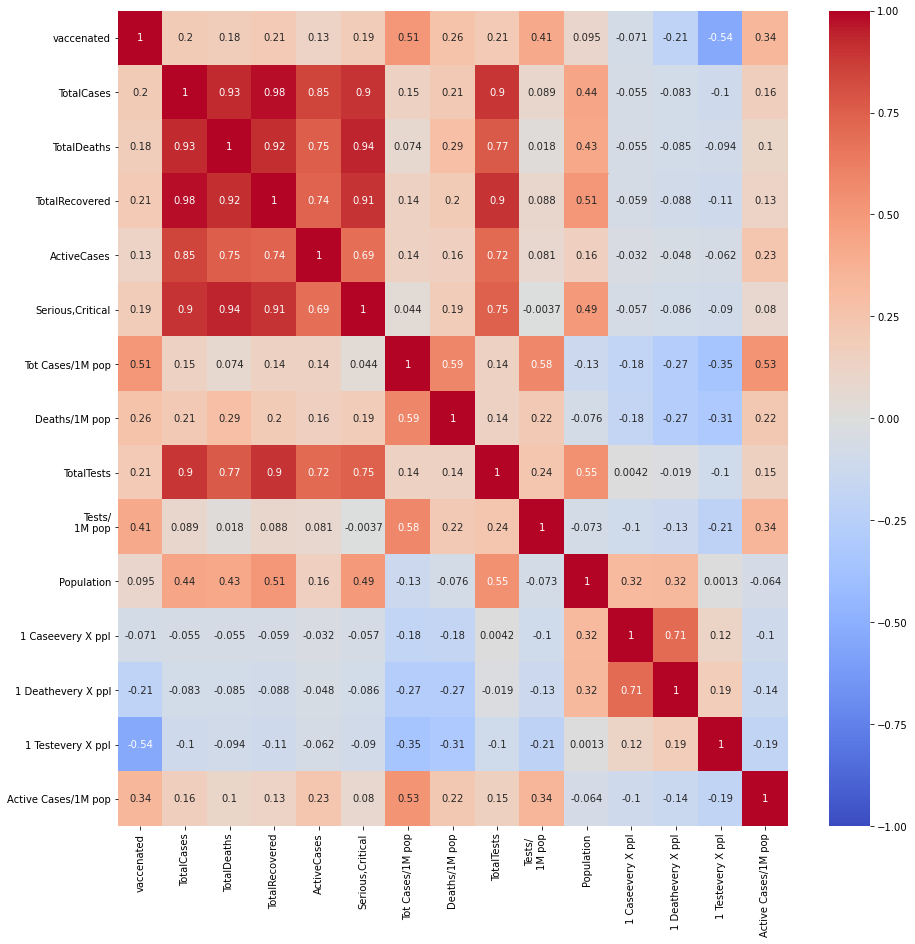

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = final_df.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [153]:
corr[abs(corr['Deaths/1M pop']) > 0.3]['Deaths/1M pop']

Tot Cases/1M pop     0.593714
Deaths/1M pop        1.000000
1 Testevery X ppl   -0.314950
Name: Deaths/1M pop, dtype: float64

In [ ]:
sns.pairplot(fh, x_vars=['accelerations','prolongued_decelerations','abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability'], y_vars='fetal_health', height=5, aspect=0.7, kind='reg')